# Data-Driven Ideological Dimension (PCA on Manifesto Project)

In [ ]:
# Imports, notebook setup

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import re

## Load and prepare data

In [129]:
#Loading full dataset

df_pm = pd.read_csv("MPDataset_MPDS2025a.csv") 

df_pm.head()

C:\Users\bruker\AppData\Local\Temp\ipykernel_14588\805778315.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pm = pd.read_csv("MPDataset_MPDS2025a.csv")


,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,candidatename,coderid,manual,coderyear,testresult,testeditsim,pervote,voteest,presvote,absseat,totseats,progtype,datasetorigin,corpusversion,total,peruncod,per101,per102,per103,per104,per105,per106,per107,per108,per109,per110,per201,per202,per203,per204,per301,per302,per303,per304,per305,per401,per402,per403,per404,per405,per406,per407,per408,per409,per410,per411,per412,per413,per414,per415,per416,per501,per502,per503,per504,per505,per506,per507,per601,per602,per603,per604,per605,per606,per607,per608,per701,per702,per703,per704,per705,per706,per1011,per1012,per1013,per1014,per1015,per1016,per1021,per1022,per1023,per1024,per1025,per1026,per1031,per1032,per1033,per2021,per2022,per2023,per2031,per2032,per2033,per2041,per3011,per3051,per3052,per3053,per3054,per3055,per4011,per4012,per4013,per4014,per4121,per4122,per4123,per4124,per4131,per4132,per5021,per5031,per5041,per5061,per6011,per6012,per6013,per6014,per6061,per6071,per6072,per6081,per7051,per7052,per7061,per7062,per103_1,per103_2,per201_1,per201_2,per202_1,per202_2,per202_3,per202_4,per305_1,per305_2,per305_3,per305_4,per305_5,per305_6,per416_1,per416_2,per601_1,per601_2,per602_1,per602_2,per605_1,per605_2,per606_1,per606_2,per607_1,per607_2,per607_3,per608_1,per608_2,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
0,11,Sweden,0,0,17/09/1944,194409,11220,Communist Party of Sweden,SKP,20,NaN,117,0,1983.0,NaN,NaN,10.3,0.0,NaN,15.0,230.0,1,41,NaN,52.0,NaN,1.9,0.0,0.0,0.000,0.0,1.900,0.0,0.0,0.0,0.0,9.6,0.0,1.9,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,3.8,0.0,0.0,0.0,1.9,0.0,1.900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.60,1.9,1.900,0.0,1.900,2025a,JN1LZH
1,11,Sweden,0,0,17/09/1944,194409,11320,Social Democratic Labour Party,SAP,30,NaN,117,0,1983.0,NaN,NaN,46.5,0.0,NaN,115.0,230.0,1,41,NaN,90.0,NaN,1.1,0.0,0.0,2.200,0.0,5.600,4.4,0.0,0.0,0.0,3.3,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,3.3,0.0,0.0,0.0,11.1,0.0,3.3,0.0,0.0,0.0,2.200,0.0,0.0,0.0,0.0,5.6,27.8,0.0,3.3,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.40,0.0,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-37.80,3.3,2.200,33.4,5.600,2025a,CMR7F6
2,11,Sweden,0,0,17/09/1944,194409,11420,People’s Party,FP,40,NaN,117,0,1983.0,NaN,NaN,12.9,0.0,NaN,26.0,230.0,1,41,NaN,63.0,NaN,3.2,0.0,0.0,7.900,0.0,1.600,3.2,0.0,0.0,0.0,12.7,6.4,0.0,0.0,3.2,0.0,1.6,0.0,0.0,6.400,3.2,1.6,1.6,0.0,0.0,0.0,3.2,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,1.6,12.7,0.0,4.8,0.0,0.000,0.0,6.4,0.0,0.0,4.8,4.8,0.0,0.0,0.0,4.80,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.50,3.2,6.400,14.3,1.600,2025a,Z6OL6C
3,11,Sweden,0,0,17/09/1944,194409,11620,Right Party,NaN,60,NaN,117,0,1983.0,NaN,NaN,15.8,0.0,NaN,39.0,230.0,1,41,NaN,57.0,NaN,1.8,0.0,0.0,1.800,0.0,0.000,3.5,0.0,0.0,0.0,7.0,0.0,0.0,0.0,1.8,0.0,1.8,0.0,0.0,17.500,0.0,1.8,0.0,0.0,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,5.300,0.0,0.0,0.0,0.0,5.3,5.3,0.0,7.0,0.0,3.500,0.

In [130]:
print("Min year:", df_pm['date'].min())
print("Max year:", df_pm['date'].max())

Min year: 192011
Max year: 202502


Overall available data from 1920 to 2025

In [135]:
#Creating a Portugal dataset

df_pm_portugal = df_pm[df_pm["country"] == 35].copy()

df_pm_portugal.head()

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,candidatename,coderid,manual,coderyear,testresult,testeditsim,pervote,voteest,presvote,absseat,totseats,progtype,datasetorigin,corpusversion,total,peruncod,per101,per102,per103,per104,per105,per106,per107,per108,per109,per110,per201,per202,per203,per204,per301,per302,per303,per304,per305,per401,per402,per403,per404,per405,per406,per407,per408,per409,per410,per411,per412,per413,per414,per415,per416,per501,per502,per503,per504,per505,per506,per507,per601,per602,per603,per604,per605,per606,per607,per608,per701,per702,per703,per704,per705,per706,per1011,per1012,per1013,per1014,per1015,per1016,per1021,per1022,per1023,per1024,per1025,per1026,per1031,per1032,per1033,per2021,per2022,per2023,per2031,per2032,per2033,per2041,per3011,per3051,per3052,per3053,per3054,per3055,per4011,per4012,per4013,per4014,per4121,per4122,per4123,per4124,per4131,per4132,per5021,per5031,per5041,per5061,per6011,per6012,per6013,per6014,per6061,per6071,per6072,per6081,per7051,per7052,per7061,per7062,per103_1,per103_2,per201_1,per201_2,per202_1,per202_2,per202_3,per202_4,per305_1,per305_2,per305_3,per305_4,per305_5,per305_6,per416_1,per416_2,per601_1,per601_2,per602_1,per602_2,per605_1,per605_2,per606_1,per606_2,per607_1,per607_2,per607_3,per608_1,per608_2,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
1859,35,Portugal,10,0,25/04/1975,197504,35210,Popular Democratic Union,UDP,20,NaN,224,1,1993.0,0.829,NaN,0.84,0.0,NaN,1.0,250.0,1,10,NaN,121.0,0.000,0.000,0.0,4.959,0.0,0.826,0.000,0.000,0.0,2.479,0.0,0.000,50.413,0.000,0.0,0.00,0.0,0.000,0.0,5.785,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,19.835,0.0,0.0,0.000,4.959,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,4.959,0.0,3.306,0.000,0.000,2.479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-55.372,0.000,0.000,4.959,0.826,2025a,Y1GQ3J
1860,35,Portugal,10,0,25/04/1975,197504,35220,Portuguese Communist Party,PCP,20,NaN,224,1,1993.0,0.829,NaN,13.46,0.0,NaN,30.0,250.0,1,10,NaN,157.0,3.822,0.000,0.0,7.643,0.0,0.000,0.000,0.637,0.0,0.000,0.0,1.911,46.497,2.548,0.0,0.00,0.0,0.637,0.0,14.013,0.000,0.000,0.000,0.000,0.0,0.0,0.0,1.911,0.0,0.000,0.000,0.000,0.637,0.000,8.280,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.637,0.0,0.000,0.0,0.0,0.0,8.280,0.0,1.274,1.274,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-44.586,0.000,0.000,0.000,0.000,2025a,S7TB52
1861,35,Portugal,10,0,25/04/1975,197504,35310,Popular Democratic Movement,MDP,30,NaN,224,1,1993.0,0.829,NaN,4.43,0.0,NaN,5.0,250.0,1,10,NaN,132.0,0.000,0.758,0.0,3.788,0.0,0.000,0.000,2.273,0.0,0.000,0.0,6.818,18.939,0.000,0.0,3.03,0.0,1.515,0.0,4.545,0.000,0.758,0.758,0.000,0.0,0.0,0.0,3.788,0.0,1.515,3.788,1.515,1.515,0.758,9.848,0.0,0.0,3.030,1.515,9.091,0.0,6.061,0.0,0.0,0.0,0.000,0.0,0.758,0.0,0.0,0.0,7.576,0.0,5.303,0.000,0.758,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-37.879,2.273,0.758,10.606,0.000,2025a,OA17UI
1862,35,Portugal,10,0,25/04/1975,197504,35311,Socialist Party,PS,30,NaN,224,1,1993.0

In [136]:
#Cleaning data

# Make a copy to be safe (optional but good practice)
df_pm_portugal = df_pm_portugal.copy()

# Get the index position of the 'date' column
pos = df_pm_portugal.columns.get_loc('date')

# Create a new 'year' column by extracting the first 4 digits
df_pm_portugal.insert(pos, 'year', df_pm_portugal['date'].astype(str).str[:4].astype(int))

# Drop the old 'date' column
df_pm_portugal = df_pm_portugal.drop(columns='date')

# Rename partyabbrev to 'CH' where partyname == 'Enough'
df_pm_portugal.loc[df_pm_portugal['partyname'] == 'Enough', 'partyabbrev'] = 'CH'

# Check the result
df_pm_portugal



,country,countryname,oecdmember,eumember,edate,year,party,partyname,partyabbrev,parfam,candidatename,coderid,manual,coderyear,testresult,testeditsim,pervote,voteest,presvote,absseat,totseats,progtype,datasetorigin,corpusversion,total,peruncod,per101,per102,per103,per104,per105,per106,per107,per108,per109,per110,per201,per202,per203,per204,per301,per302,per303,per304,per305,per401,per402,per403,per404,per405,per406,per407,per408,per409,per410,per411,per412,per413,per414,per415,per416,per501,per502,per503,per504,per505,per506,per507,per601,per602,per603,per604,per605,per606,per607,per608,per701,per702,per703,per704,per705,per706,per1011,per1012,per1013,per1014,per1015,per1016,per1021,per1022,per1023,per1024,per1025,per1026,per1031,per1032,per1033,per2021,per2022,per2023,per2031,per2032,per2033,per2041,per3011,per3051,per3052,per3053,per3054,per3055,per4011,per4012,per4013,per4014,per4121,per4122,per4123,per4124,per4131,per4132,per5021,per5031,per5041,per5061,per6011,per6012,per6013,per6014,per6061,per6071,per6072,per6081,per7051,per7052,per7061,per7062,per103_1,per103_2,per201_1,per201_2,per202_1,per202_2,per202_3,per202_4,per305_1,per305_2,per305_3,per305_4,per305_5,per305_6,per416_1,per416_2,per601_1,per601_2,per602_1,per602_2,per605_1,per605_2,per606_1,per606_2,per607_1,per607_2,per607_3,per608_1,per608_2,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
1859,35,Portugal,10,0,25/04/1975,1975,35210,Popular Democratic Union,UDP,20,NaN,224,1,1993.0,0.829,NaN,0.840000,0.0,NaN,1.0,250.0,1,10,NaN,121.0,0.000,0.000,0.0,4.959,0.000,0.826,0.000,0.000,0.000,2.479,0.000,0.000,50.413,0.000,0.000,0.000,0.000,0.000,0.000,5.785,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,19.835,0.000,0.000,0.000,4.959,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,4.959,0.000,3.306,0.000,0.000,2.479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-55.372,0.000,0.000,4.959,0.826,2025a,Y1GQ3J
1860,35,Portugal,10,0,25/04/1975,1975,35220,Portuguese Communist Party,PCP,20,NaN,224,1,1993.0,0.829,NaN,13.460000,0.0,NaN,30.0,250.0,1,10,NaN,157.0,3.822,0.000,0.0,7.643,0.000,0.000,0.000,0.637,0.000,0.000,0.000,1.911,46.497,2.548,0.000,0.000,0.000,0.637,0.000,14.013,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.911,0.000,0.000,0.000,0.000,0.637,0.000,8.280,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.637,0.0,0.000,0.000,0.000,0.000,8.280,0.000,1.274,1.274,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-44.586,0.000,0.000,0.000,0.000,2025a,S7TB52
1861,35,Portugal,10,0,25/04/1975,1975,35310,Popular Democratic Movement,MDP,30,NaN,224,1,1993.0,0.829,NaN,4.430000,0.0,NaN,5.0,250.0,1,10,NaN,132.0,0.000,0.758,0.0,3.788,0.000,0.000,0.000,2.273,0.000,0.000,0.000,6.818,18.939,0.000,0.000,3.030,0.000,1.515,0.000,4.545,0.000,0.758,0.758,0.000,0.000,0.000,0.000,3.788,0.000,1.515,3.788,1.515,1.515,0.758,9.848,0.000,0.000,3.030,1.515,9.091,0.000,6.061,0.000,0.000,0.000,0.000,0.0,0.758,0.000,0.000,0.000,7.576,0.000,5.303,0.000,0.758,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-

In [137]:
#Included parties
df_pm_portugal["partyname"].unique()

array(['Popular Democratic Union', 'Portuguese Communist Party',
       'Popular Democratic Movement', 'Socialist Party',
       'Popular Democratic Party', 'Social Democratic Center Party',
       'Popular Monarchist Party', 'Social Democratic Party',
       'Association of Independent Social Democrats',
       'Leftwing Union for the Socialist Democracy',
       "Ecologist Party ‘The Greens'", 'Democratic Renewal Party',
       'Democratic Intervention', 'Unified Democratic Coalition',
       'National Solidarity Party',
       'Social Democratic Center-Popular Party', 'Left Bloc',
       'Portugal Ahead', 'People-Animals-Nature', 'Free',
       'Liberal Iniciative', 'Enough'], dtype=object)

In [138]:
#Available timeframe
print("Min year:", df_pm_portugal['year'].min())
print("Max year:", df_pm_portugal['year'].max())

Min year: 1975
Max year: 2022


Available data in Portugal from 1975 to 2022. It will not capture the full strength of the polarization, as Chega gained their big increase in seats in the 2024 elections. 

## Select policy variables and preprocess

In [17]:
# Select all issue variables (the perXXX columns)
policy_cols = [c for c in df_pm_portugal.columns if c.startswith('per') and c[3:].isdigit()]

# Keep only relevant columns
X = df_pm_portugal[policy_cols].copy()

# Standardize (important for PCA)
X_scaled = StandardScaler().fit_transform(X)

c:\Users\bruker\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\bruker\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\bruker\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


PCA is sensitive to scale, so we standardize the issue variables (mean = 0, SD = 1).
Each manifesto becomes a 56-dimensional vector of issue emphasis.

In [18]:
pca = PCA(n_components=5)
pca_result = pca.fit_transform(X_scaled)

# Add principal components back to the dataframe
for i in range(pca_result.shape[1]):
    df_pm_portugal[f'PC{i+1}'] = pca_result[:, i]

# Explained variance
explained_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, 6), explained_var, marker='o')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [139]:
df_pm_portugal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 1859 to 1979
Columns: 175 entries, country to id_perm
dtypes: float64(157), int64(10), object(8)
memory usage: 166.4+ KB


In [140]:
pd.set_option('display.max_columns', None)
df_pm_portugal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 1859 to 1979
Columns: 175 entries, country to id_perm
dtypes: float64(157), int64(10), object(8)
memory usage: 166.4+ KB


In [141]:
# Show only columns that contain any missing values
missing_cols = df_pm_portugal.columns[df_pm_portugal.isna().any()]
print("Columns with missing values:", len(missing_cols))
missing_cols


Columns with missing values: 95


Index(['candidatename', 'coderyear', 'testresult', 'testeditsim', 'pervote',
       'voteest', 'presvote', 'absseat', 'corpusversion', 'per1011', 'per1012',
       'per1013', 'per1014', 'per1015', 'per1016', 'per1021', 'per1022',
       'per1023', 'per1024', 'per1025', 'per1026', 'per1031', 'per1032',
       'per1033', 'per2021', 'per2022', 'per2023', 'per2031', 'per2032',
       'per2033', 'per2041', 'per3011', 'per3051', 'per3052', 'per3053',
       'per3054', 'per3055', 'per4011', 'per4012', 'per4013', 'per4014',
       'per4121', 'per4122', 'per4123', 'per4124', 'per4131', 'per4132',
       'per5021', 'per5031', 'per5041', 'per5061', 'per6011', 'per6012',
       'per6013', 'per6014', 'per6061', 'per6071', 'per6072', 'per6081',
       'per7051', 'per7052', 'per7061', 'per7062', 'per103_1', 'per103_2',
       'per201_1', 'per201_2', 'per202_1', 'per202_2', 'per202_3', 'per202_4',
       'per305_1', 'per305_2', 'per305_3', 'per305_4', 'per305_5', 'per305_6',
       'per416_1', 'per416

In [142]:
cols = [
    'partyabbrev', 'candidatename', 'coderyear', 'testresult',
    'testeditsim', 'pervote', 'voteest', 'presvote', 'absseat',
    'corpusversion', 'per1011', 'per1012', 'per1013', 'per1014', 'per1015'
]

df_pm_portugal[cols].isna().sum()


partyabbrev        0
candidatename    121
coderyear          7
testresult        13
testeditsim       89
pervote            5
voteest            5
presvote         121
absseat            5
corpusversion     83
per1011          121
per1012          121
per1013          121
per1014          121
per1015          121
dtype: int64

In [143]:
cols_to_drop = [
    'per1011', 'per1012', 'per1013', 'per1014', 'per1015', 'per1016',
    'per1021', 'per1022', 'per1023', 'per1024', 'per1025', 'per1026',
    'per1031', 'per1032', 'per1033', 'per2021', 'per2022', 'per2023',
    'per2031', 'per2032', 'per2033', 'per2041', 'per3011', 'per3051',
    'per3052', 'per3053', 'per3054', 'per3055', 'per4011', 'per4012',
    'per4013', 'per4014', 'per4121', 'per4122', 'per4123', 'per4124',
    'per4131', 'per4132', 'per5021', 'per5031', 'per5041', 'per5061',
    'per6011', 'per6012', 'per6013', 'per6014', 'per6061', 'per6071',
    'per6072', 'per6081', 'per7051', 'per7052', 'per7061', 'per7062',
    'per103_1', 'per103_2', 'per201_1', 'per201_2', 'per202_1', 'per202_2',
    'per202_3', 'per202_4', 'per305_1', 'per305_2', 'per305_3', 'per305_4',
    'per305_5', 'per305_6', 'per416_1', 'per416_2', 'per601_1', 'per601_2',
    'per602_1', 'per602_2', 'per605_1', 'per605_2', 'per606_1', 'per606_2',
    'per607_1', 'per607_2', 'per607_3', 'per608_1', 'per608_2', 'per608_3',
    'per703_1', 'per703_2'
]

# Drop only if the columns exist
df_pm_portugal = df_pm_portugal.drop(columns=[c for c in cols_to_drop if c in df_pm_portugal.columns])

# Check result
print("Remaining columns:", df_pm_portugal.shape[1])


Remaining columns: 89


In [144]:
df_pm_portugal

,country,countryname,oecdmember,eumember,edate,year,party,partyname,partyabbrev,parfam,candidatename,coderid,manual,coderyear,testresult,testeditsim,pervote,voteest,presvote,absseat,totseats,progtype,datasetorigin,corpusversion,total,peruncod,per101,per102,per103,per104,per105,per106,per107,per108,per109,per110,per201,per202,per203,per204,per301,per302,per303,per304,per305,per401,per402,per403,per404,per405,per406,per407,per408,per409,per410,per411,per412,per413,per414,per415,per416,per501,per502,per503,per504,per505,per506,per507,per601,per602,per603,per604,per605,per606,per607,per608,per701,per702,per703,per704,per705,per706,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
1859,35,Portugal,10,0,25/04/1975,1975,35210,Popular Democratic Union,UDP,20,NaN,224,1,1993.0,0.829,NaN,0.840000,0.0,NaN,1.0,250.0,1,10,NaN,121.0,0.000,0.000,0.0,4.959,0.000,0.826,0.000,0.000,0.000,2.479,0.000,0.000,50.413,0.000,0.000,0.000,0.000,0.000,0.000,5.785,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,19.835,0.000,0.000,0.000,4.959,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,4.959,0.000,3.306,0.000,0.000,2.479,-55.372,0.000,0.000,4.959,0.826,2025a,Y1GQ3J
1860,35,Portugal,10,0,25/04/1975,1975,35220,Portuguese Communist Party,PCP,20,NaN,224,1,1993.0,0.829,NaN,13.460000,0.0,NaN,30.0,250.0,1,10,NaN,157.0,3.822,0.000,0.0,7.643,0.000,0.000,0.000,0.637,0.000,0.000,0.000,1.911,46.497,2.548,0.000,0.000,0.000,0.637,0.000,14.013,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.911,0.000,0.000,0.000,0.000,0.637,0.000,8.280,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.637,0.0,0.000,0.000,0.000,0.000,8.280,0.000,1.274,1.274,0.000,0.000,-44.586,0.000,0.000,0.000,0.000,2025a,S7TB52
1861,35,Portugal,10,0,25/04/1975,1975,35310,Popular Democratic Movement,MDP,30,NaN,224,1,1993.0,0.829,NaN,4.430000,0.0,NaN,5.0,250.0,1,10,NaN,132.0,0.000,0.758,0.0,3.788,0.000,0.000,0.000,2.273,0.000,0.000,0.000,6.818,18.939,0.000,0.000,3.030,0.000,1.515,0.000,4.545,0.000,0.758,0.758,0.000,0.000,0.000,0.000,3.788,0.000,1.515,3.788,1.515,1.515,0.758,9.848,0.000,0.000,3.030,1.515,9.091,0.000,6.061,0.000,0.000,0.000,0.000,0.0,0.758,0.000,0.000,0.000,7.576,0.000,5.303,0.000,0.758,0.000,-37.879,2.273,0.758,10.606,0.000,2025a,OA17UI
1862,35,Portugal,10,0,25/04/1975,1975,35311,Socialist Party,PS,30,NaN,224,1,1993.0,0.829,NaN,40.690000,0.0,NaN,116.0,250.0,1,10,NaN,74.0,0.000,2.703,0.0,9.459,0.000,2.703,0.000,8.108,0.000,0.000,0.000,4.054,40.541,0.000,0.000,0.000,0.000,0.000,0.000,9.459,0.000,0.000,2.703,1.351,0.000,0.000,0.000,4.054,0.000,0.000,0.000,0.000,4.054,0.000,6.757,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,2.703,0.000,1.351,0.000,0.000,0.000,-58.108,4.054,0.000,0.000,2.703,2025a,FRUEBV
1863,35,Portugal,10,0,25/04/1975,1975,35313,Popular Democratic Party,PPD,60,NaN,224,1,1993.0,0.829,NaN,28.350000,0.0,NaN,81.0,250.0,1,10,NaN,53.0,0.000,1.887,0.0,0.000,0.000,0.000,3.774,0.000,0.000,1.887,0.000,18.868,9.434,0.000,0.000,0.000,0.000,3.774,0.000,5.660,1.887,3.774,3.774,0.000,0.000,0.000,0.000,0.000,0.000,1.887,0.000,3.774,1.887,0.000,0.000,0.000,0.000,1.887,18.868,1.887,0.000,1.887,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,5.660,0.000,1.887,0.000,1.887,3.774,-1.887,7.547,1.887,20.755,3.774,2025a,PI4RAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,35,Portugal,10,10,30/01/2022,2022,35311,Socialist Party,PS,30,NaN,351,5,2024.0,0.935,0.978,42.501331,0.0,NaN,120.0,230.0,1,200,2025-1,1904.0,0.263,0.420,0.0,0.000,3.729,0.000,0.000,1.471,0.578,0.000,0.000,0.630,4.779,0.000,0.000,1.838,0.000,7.511,1.208,0.105,0.105,3.046,1.418,0.210,0.368,0

In [145]:
# Find columns matching 'per' followed by 4 digits (e.g. per1011)
per4 = [c for c in df_pm_portugal.columns if re.match(r'^per\d{4}$', c)]

# Find columns matching 'per' + 3 digits + '_' + 1 digit (e.g. per305_1)
per3_1 = [c for c in df_pm_portugal.columns if re.match(r'^per\d{3}_\d$', c)]

print("Columns matching 'perXXXX' (4 digits):", per4)
print("→ Count:", len(per4))

print("\nColumns matching 'perXXX_X' (3 digits + underscore + 1 digit):", per3_1)
print("→ Count:", len(per3_1))


Columns matching 'perXXXX' (4 digits): []
→ Count: 0

Columns matching 'perXXX_X' (3 digits + underscore + 1 digit): []
→ Count: 0


Removed all of the four digit variables with underscore (per103_1-per703_2) because these are new categories introduced with version 5 of the coding instructions, and not relevant for Portugal. 

Removed all of the four digit variables (per1011-per7062) are sub-categories because these are mostly addressing issues in transitional democracies in (mostly) Central and Eastern European countries, and not relevant for Portugal. 

In [146]:
# Show only columns that contain any missing values
missing_cols = df_pm_portugal.columns[df_pm_portugal.isna().any()]
print("Columns with missing values:", len(missing_cols))
missing_cols

Columns with missing values: 9


Index(['candidatename', 'coderyear', 'testresult', 'testeditsim', 'pervote',
       'voteest', 'presvote', 'absseat', 'corpusversion'],
      dtype='object')

In [147]:
cols = [
    'partyabbrev', 'candidatename', 'coderyear', 'testresult',
    'testeditsim', 'pervote', 'voteest', 'presvote', 'absseat',
    'corpusversion']

df_pm_portugal[cols].isna().sum()

partyabbrev        0
candidatename    121
coderyear          7
testresult        13
testeditsim       89
pervote            5
voteest            5
presvote         121
absseat            5
corpusversion     83
dtype: int64

In [148]:
cols_to_drop = [
    'candidatename', 'coderyear', 'testresult', 'testeditsim', 'presvote', 'corpusversion'
]

# Drop only if the columns exist
df_pm_portugal = df_pm_portugal.drop(columns=[c for c in cols_to_drop if c in df_pm_portugal.columns])

# Check result
print("Remaining columns:", df_pm_portugal.shape[1])


Remaining columns: 83


Removed candidatename and presvote as it was not applicable for parliamentary elections in Portugal. 

Removed coderyear, testresult and testeditsim as these are related to the coders of the dataset and not for analysing results in Portugal. 

Removed corpusversion because there were more than 60% missing, meaning that they used party programmes directly and not from the manifesto corpus. 

In [149]:
# Show only columns that contain any missing values
missing_cols = df_pm_portugal.columns[df_pm_portugal.isna().any()]
print("Columns with missing values:", len(missing_cols))
missing_cols

Columns with missing values: 3


Index(['pervote', 'voteest', 'absseat'], dtype='object')

In [150]:
cols = [
    'partyabbrev', 'pervote', 'voteest', 'absseat']

df_pm_portugal[cols].isna().sum()

partyabbrev    0
pervote        5
voteest        5
absseat        5
dtype: int64

In [151]:
cols = ['pervote'] 
        #'pervote', 'voteest', 'absseat', 'corpusversion']

# Show rows with missing values in any of these columns
missing_rows = df_pm_portugal[df_pm_portugal[cols].isna().any(axis=1)]

# Display results
print(f"Number of rows with missing values: {len(missing_rows)}")
missing_rows


Number of rows with missing values: 5


,country,countryname,oecdmember,eumember,edate,year,party,partyname,partyabbrev,parfam,coderid,manual,pervote,voteest,absseat,totseats,progtype,datasetorigin,total,peruncod,per101,per102,per103,per104,per105,per106,per107,per108,per109,per110,per201,per202,per203,per204,per301,per302,per303,per304,per305,per401,per402,per403,per404,per405,per406,per407,per408,per409,per410,per411,per412,per413,per414,per415,per416,per501,per502,per503,per504,per505,per506,per507,per601,per602,per603,per604,per605,per606,per607,per608,per701,per702,per703,per704,per705,per706,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
1911,35,Portugal,10,10,06/10/1991,1991,35220,Portuguese Communist Party,PCP,20,224,1,NaN,NaN,NaN,226.0,1,20,1898.0,0.158,0.580,0.105,0.316,1.054,1.001,0.316,1.897,3.109,0.369,1.528,2.318,5.111,1.001,0.0,2.792,0.000,6.481,1.475,5.321,0.211,1.159,1.528,0.211,0.105,0.316,0.0,3.741,0.000,1.423,4.478,0.105,0.632,0.738,0.105,0.000,3.899,7.903,8.957,9.273,0.0,4.531,0.0,0.105,0.0,0.105,0.105,1.528,0.896,0.263,0.000,4.320,0.0,2.529,0.105,2.792,3.003,-15.121,1.844,0.948,18.230,1.423,2025a,4NMDHH
1917,35,Portugal,10,10,01/10/1995,1995,35220,Portuguese Communist Party,PCP,20,224,1,NaN,NaN,NaN,230.0,1,20,2986.0,0.000,0.636,0.067,0.435,0.670,0.469,0.100,1.407,1.808,0.067,1.172,2.378,5.559,0.971,0.0,3.014,0.000,4.253,1.072,2.981,0.000,0.536,3.650,0.000,0.067,0.569,0.0,6.062,0.000,1.273,5.894,0.167,1.674,0.904,0.435,0.000,3.315,7.267,7.904,12.592,0.0,4.923,0.0,0.268,0.0,0.502,0.167,1.608,0.603,0.737,0.000,4.052,0.0,4.220,0.201,1.340,2.009,-24.180,3.818,0.904,20.496,0.636,2025a,YJBYNZ
1923,35,Portugal,10,10,10/10/1999,1999,35220,Portuguese Communist Party,PCP,20,224,1,NaN,NaN,NaN,230.0,1,20,3286.0,0.000,0.396,0.000,0.822,0.700,0.396,0.061,0.883,1.309,0.517,0.943,2.404,4.687,0.548,0.0,1.765,0.030,4.078,1.035,3.652,0.030,1.339,5.843,0.000,0.061,0.700,0.0,3.743,0.000,0.122,6.086,0.396,3.135,0.122,0.183,0.000,3.439,7.121,7.395,13.268,0.0,6.147,0.0,0.000,0.0,0.000,0.274,1.461,0.578,0.152,0.000,3.561,0.0,3.621,0.091,2.282,4.626,-29.063,6.239,0.152,20.663,0.456,2025a,9VMWL5
1931,35,Portugal,10,10,17/03/2002,2002,35229,Unified Democratic Coalition,CDU,20,999,999,NaN,NaN,NaN,230.0,4,30,3079.0,0.000,0.162,0.000,0.097,0.390,0.779,0.195,0.942,0.455,0.650,2.956,1.072,3.897,0.487,0.0,3.020,0.227,10.555,0.747,3.540,0.065,3.410,4.514,0.162,0.032,0.260,0.0,0.682,0.000,0.909,7.145,0.162,3.670,0.292,1.624,0.325,5.229,5.034,6.496,9.354,0.0,4.937,0.0,0.422,0.0,0.130,0.292,3.085,0.942,0.130,0.487,4.482,0.0,3.150,0.520,0.520,1.364,-19.617,4.839,0.357,15.849,0.974,2025a,Y9WVIR
1938,35,Portugal,10,10,20/02/2005,2005,35229,Unified Democratic Coalition,CDU,20,999,999,NaN,NaN,NaN,230.0,4,30,3136.0,0.000,0.383,0.000,0.287,0.287,0.989,0.223,1.531,0.351,1.371,1.563,1.180,2.934,0.829,0.0,2.902,0.096,9.694,1.722,1.339,0.064,4.624,5.006,0.287,0.159,0.223,0.0,0.191,0.351,3.635,7.366,0.159,4.305,0.159,0.351,0.606,4.911,3.699,5.899,9.279,0.0,5.389,0.0,0.574,0.0,0.415,0.383,1.467,1.339,0.255,0.478,5.548,0.0,2.966,0.957,0.032,1.244,-23.884,5.453,0.223,15.179,1.212,2025a,KPLSLV


In [152]:
#Sometimes there are records of both PCP and PEV individually even though they ran together as the CDU coaltion 
# (coalition also changed names sometimes, but it looks like it is sticking with CDU thorughout). Keeping numbers from CDU and 
# removing individual entries. 

# 1. Find all years where CDU appears
years_with_cdu = df_pm_portugal.loc[df_pm_portugal['partyabbrev'] == 'CDU', 'year'].unique()

# 2. Remove PCP or PEV entries from those same years
df_pm_portugal = df_pm_portugal[~(
    (df_pm_portugal['year'].isin(years_with_cdu)) &
    (df_pm_portugal['partyabbrev'].isin(['PCP', 'PEV']))
)]

# 3. (Optional) Reset index for cleanliness
df_pm_portugal = df_pm_portugal.reset_index(drop=True)

In [153]:
# Fill in missing values for CDU 

# in 2002
mask = (df_pm_portugal['year'] == 2002) & (df_pm_portugal['partyabbrev'] == 'CDU')

df_pm_portugal.loc[mask, 'voteest'] = 1
df_pm_portugal.loc[mask, 'absseat'] = 12
df_pm_portugal.loc[mask, 'totseats'] = 230
df_pm_portugal.loc[mask, 'pervote'] = 6.94

# in 2005
mask = (df_pm_portugal['year'] == 2005) & (df_pm_portugal['partyabbrev'] == 'CDU')

df_pm_portugal.loc[mask, 'voteest'] = 1
df_pm_portugal.loc[mask, 'absseat'] = 14
df_pm_portugal.loc[mask, 'totseats'] = 230
df_pm_portugal.loc[mask, 'pervote'] = 7.54

In [154]:
df_pm_portugal[df_pm_portugal['year'] == 2011]

,country,countryname,oecdmember,eumember,edate,year,party,partyname,partyabbrev,parfam,coderid,manual,pervote,voteest,absseat,totseats,progtype,datasetorigin,total,peruncod,per101,per102,per103,per104,per105,per106,per107,per108,per109,per110,per201,per202,per203,per204,per301,per302,per303,per304,per305,per401,per402,per403,per404,per405,per406,per407,per408,per409,per410,per411,per412,per413,per414,per415,per416,per501,per502,per503,per504,per505,per506,per507,per601,per602,per603,per604,per605,per606,per607,per608,per701,per702,per703,per704,per705,per706,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
82,35,Portugal,10,10,05/06/2011,2011,35110,Ecologist Party ‘The Greens',PEV,10,264,4,1.029,1.0,2.0,230.0,1,61,127.0,0.000,0.000,0.0,0.0,0.000,0.787,0.787,0.000,0.000,1.575,2.362,1.575,0.787,0.787,0.000,0.000,0.0,0.000,0.000,5.512,0.000,0.000,1.575,0.000,0.000,0.0,0.0,3.937,7.087,14.173,3.937,0.787,6.299,0.000,0.000,1.575,11.811,0.000,9.449,4.724,0.000,5.512,0.000,0.000,0.0,0.000,0.000,1.575,0.000,0.000,0.0,2.362,0.0,11.024,0.000,0.0,0.000,-14.173,2.362,0.000,14.173,1.575,2025a,9K8FZN
83,35,Portugal,10,10,05/06/2011,2011,35211,Left Bloc,BE,20,264,4,5.393,0.0,8.0,230.0,1,61,1153.0,0.000,0.000,0.0,0.0,0.000,0.347,0.000,0.000,0.781,0.000,2.602,0.000,1.474,0.000,0.000,0.000,0.0,3.209,5.898,0.867,0.000,0.087,3.296,4.337,0.000,0.0,0.0,2.515,11.795,1.301,0.694,2.949,4.857,0.434,0.694,0.000,4.250,2.602,5.551,16.132,0.000,5.551,0.000,0.000,0.0,0.000,0.000,6.158,0.000,0.000,0.0,4.423,0.0,6.938,0.000,0.0,0.260,-35.820,10.581,0.434,21.683,0.347,2025a,9ORO31
84,35,Portugal,10,10,05/06/2011,2011,35220,Portuguese Communist Party,PCP,20,264,4,7.201,1.0,14.0,230.0,1,61,200.0,0.000,0.000,0.0,0.0,0.000,1.500,0.000,0.000,0.000,5.500,8.000,2.000,5.000,3.500,0.000,0.000,0.0,0.000,2.000,6.000,0.000,1.500,6.000,0.500,0.000,0.0,0.0,6.000,11.000,7.000,0.500,1.000,4.000,0.500,2.000,0.500,0.000,0.000,9.000,6.500,0.000,0.500,0.000,0.000,0.0,0.000,0.000,2.500,0.000,0.000,0.0,6.000,0.0,1.500,0.000,0.0,0.000,-15.000,7.500,0.500,15.500,1.500,2025a,D4YCVC
85,35,Portugal,10,10,05/06/2011,2011,35311,Socialist Party,PS,30,264,4,29.239,0.0,74.0,230.0,1,61,829.0,0.844,0.965,0.0,0.0,0.724,0.000,0.000,1.568,2.171,0.000,0.000,0.121,3.016,0.000,0.000,2.895,0.0,6.393,0.603,5.549,0.000,2.413,2.171,0.000,0.241,0.0,0.0,0.362,3.619,7.720,4.222,0.483,0.483,5.790,0.000,0.362,4.222,8.203,4.946,9.168,0.362,6.514,0.000,0.000,0.0,0.000,0.121,8.806,0.000,0.000,0.0,0.121,0.0,3.136,0.000,0.0,1.689,0.241,2.654,5.790,14.113,0.000,2025a,BM81AH
86,35,Portugal,10,10,05/06/2011,2011,35313,Social Democratic Party,PSD,60,264,4,40.306,0.0,108.0,230.0,1,61,2693.0,0.223,0.520,0.0,0.0,1.003,0.000,0.000,1.560,0.557,0.000,0.000,0.000,1.857,0.037,0.000,3.899,0.0,10.732,0.520,1.820,2.785,10.917,4.567,0.149,0.149,0.0,0.0,0.743,0.149,9.989,4.122,0.037,0.223,9.061,0.000,0.371,2.525,2.971,3.193,5.681,2.005,6.313,0.334,0.111,0.0,0.000,0.000,5.421,0.371,0.111,0.0,0.334,0.0,3.453,0.706,0.0,0.483,12.811,4.753,11.846,8.875,0.000,2025a,FK5OCD
87,35,Portugal,10,10,05/06/2011,2011,35520,Social Democratic Center-Popular Party,CDS-PP,50,264,4,12.210,0.0,24.0,230.0,1,61,1065.0,0.000,0.282,0.0,0.0,0.563,0.000,0.000,0.188,0.000,0.000,0.000,0.000,0.282,0.000,0.469,1.690,0.0,9.014,1.878,0.000,0.845,8.826,3.756,0.000,0.563,0.0,0.0,1.221,0.000,3.380,1.315,0.000,0.751,8.451,0.000,0.000,0.751,1.033,5.258,11.174,9.953,4.977,0.751,0.000,0.0,0.657,0.000,14.460,0.939,0.000,0.0,0.751,0.0,5.822,0.000,0.0,0.000,22.817,3.756,9.296,16.432,0.000,2025a,K93EY1


In [155]:
cols = ['pervote', 'voteest', 'absseat']

df_pm_portugal[cols].isna().sum()

pervote    0
voteest    0
absseat    0
dtype: int64

Filling in missing values on pervote, absseat and voteest from official Portugues Archives
https://www.parlamento.pt/sites/EN/Parliament/Paginas/Election-results.aspx



In [156]:
df_pm_portugal.loc[df_pm_portugal['year'] == 1991,
                   ['partyname', 'partyabbrev', 'pervote', 'voteest', 'absseat']]


,partyname,partyabbrev,pervote,voteest,absseat
52,Unified Democratic Coalition,CDU,8.961,0.0,17.0
53,Socialist Party,PS,29.580,0.0,71.0
54,Social Democratic Party,PSD,50.993,0.0,132.0
55,Social Democratic Center Party,CDS,4.433,0.0,5.0
56,National Solidarity Party,PSN,1.706,0.0,1.0


In [157]:
df_pm_portugal

,country,countryname,oecdmember,eumember,edate,year,party,partyname,partyabbrev,parfam,coderid,manual,pervote,voteest,absseat,totseats,progtype,datasetorigin,total,peruncod,per101,per102,per103,per104,per105,per106,per107,per108,per109,per110,per201,per202,per203,per204,per301,per302,per303,per304,per305,per401,per402,per403,per404,per405,per406,per407,per408,per409,per410,per411,per412,per413,per414,per415,per416,per501,per502,per503,per504,per505,per506,per507,per601,per602,per603,per604,per605,per606,per607,per608,per701,per702,per703,per704,per705,per706,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
0,35,Portugal,10,0,25/04/1975,1975,35210,Popular Democratic Union,UDP,20,224,1,0.840000,0.0,1.0,250.0,1,10,121.0,0.000,0.000,0.0,4.959,0.000,0.826,0.000,0.000,0.000,2.479,0.000,0.000,50.413,0.000,0.000,0.000,0.000,0.000,0.000,5.785,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,19.835,0.000,0.000,0.000,4.959,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,4.959,0.000,3.306,0.000,0.000,2.479,-55.372,0.000,0.000,4.959,0.826,2025a,Y1GQ3J
1,35,Portugal,10,0,25/04/1975,1975,35220,Portuguese Communist Party,PCP,20,224,1,13.460000,0.0,30.0,250.0,1,10,157.0,3.822,0.000,0.0,7.643,0.000,0.000,0.000,0.637,0.000,0.000,0.000,1.911,46.497,2.548,0.000,0.000,0.000,0.637,0.000,14.013,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.911,0.000,0.000,0.000,0.000,0.637,0.000,8.280,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.637,0.0,0.000,0.000,0.000,0.000,8.280,0.000,1.274,1.274,0.000,0.000,-44.586,0.000,0.000,0.000,0.000,2025a,S7TB52
2,35,Portugal,10,0,25/04/1975,1975,35310,Popular Democratic Movement,MDP,30,224,1,4.430000,0.0,5.0,250.0,1,10,132.0,0.000,0.758,0.0,3.788,0.000,0.000,0.000,2.273,0.000,0.000,0.000,6.818,18.939,0.000,0.000,3.030,0.000,1.515,0.000,4.545,0.000,0.758,0.758,0.000,0.000,0.000,0.000,3.788,0.000,1.515,3.788,1.515,1.515,0.758,9.848,0.000,0.000,3.030,1.515,9.091,0.000,6.061,0.000,0.000,0.000,0.000,0.0,0.758,0.000,0.000,0.000,7.576,0.000,5.303,0.000,0.758,0.000,-37.879,2.273,0.758,10.606,0.000,2025a,OA17UI
3,35,Portugal,10,0,25/04/1975,1975,35311,Socialist Party,PS,30,224,1,40.690000,0.0,116.0,250.0,1,10,74.0,0.000,2.703,0.0,9.459,0.000,2.703,0.000,8.108,0.000,0.000,0.000,4.054,40.541,0.000,0.000,0.000,0.000,0.000,0.000,9.459,0.000,0.000,2.703,1.351,0.000,0.000,0.000,4.054,0.000,0.000,0.000,0.000,4.054,0.000,6.757,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,2.703,0.000,1.351,0.000,0.000,0.000,-58.108,4.054,0.000,0.000,2.703,2025a,FRUEBV
4,35,Portugal,10,0,25/04/1975,1975,35313,Popular Democratic Party,PPD,60,224,1,28.350000,0.0,81.0,250.0,1,10,53.0,0.000,1.887,0.0,0.000,0.000,0.000,3.774,0.000,0.000,1.887,0.000,18.868,9.434,0.000,0.000,0.000,0.000,3.774,0.000,5.660,1.887,3.774,3.774,0.000,0.000,0.000,0.000,0.000,0.000,1.887,0.000,3.774,1.887,0.000,0.000,0.000,0.000,1.887,18.868,1.887,0.000,1.887,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,5.660,0.000,1.887,0.000,1.887,3.774,-1.887,7.547,1.887,20.755,3.774,2025a,PI4RAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,35,Portugal,10,10,30/01/2022,2022,35311,Socialist Party,PS,30,351,5,42.501331,0.0,120.0,230.0,1,200,1904.0,0.263,0.420,0.0,0.000,3.729,0.000,0.000,1.471,0.578,0.000,0.000,0.630,4.779,0.000,0.000,1.838,0.000,7.511,1.208,0.105,0.105,3.046,1.418,0.210,0.368,0.000,0.105,0.473,0.840,3.834,10.609,0.105,0.000,0.578,0.000,7.983,5.252,5.095,7.931,11.817,0.630,7.038,0.000,1.103,0.683,0.105,0.0,2.153,0.368,0.630,0.000,3.571,0.000,1.418,0.000,0.000,0.000,-17.752,1.733,0.683,19.748,0.000,2025a,Z45GYT
110,35,Portugal,10,10,30/01/2022,2022,35313,Social D

## Select policy variables and preprocess


In [158]:
# Select all issue variables (the perXXX columns)
policy_cols = [c for c in df_pm_portugal.columns if c.startswith('per') and c[3:].isdigit()]

# Keep only relevant columns
X = df_pm_portugal[policy_cols].copy()

# Standardize (important for PCA)
X_scaled = StandardScaler().fit_transform(X)

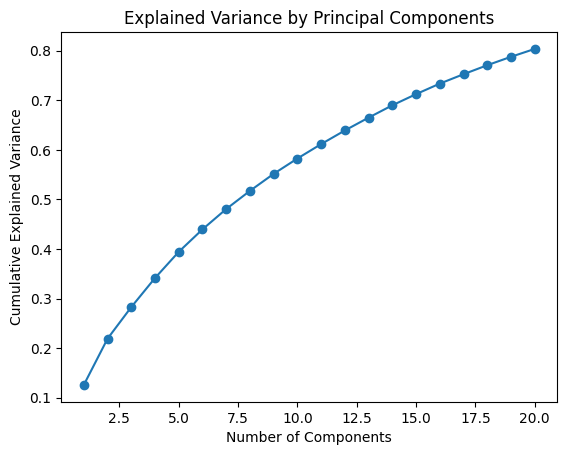

In [159]:
pca = PCA(n_components=20)
pca_result = pca.fit_transform(X_scaled)

# Add principal components back to the dataframe
for i in range(pca_result.shape[1]):
    df_pm_portugal[f'PC{i+1}'] = pca_result[:, i]

# Explained variance
explained_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, 21), explained_var, marker='o')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

The curve shows that roughly the first 5–7 principal components capture the majority of the information (variance) across all policy variables in the Manifesto Project data — meaning those few components summarize the key ideological patterns among Portuguese parties.

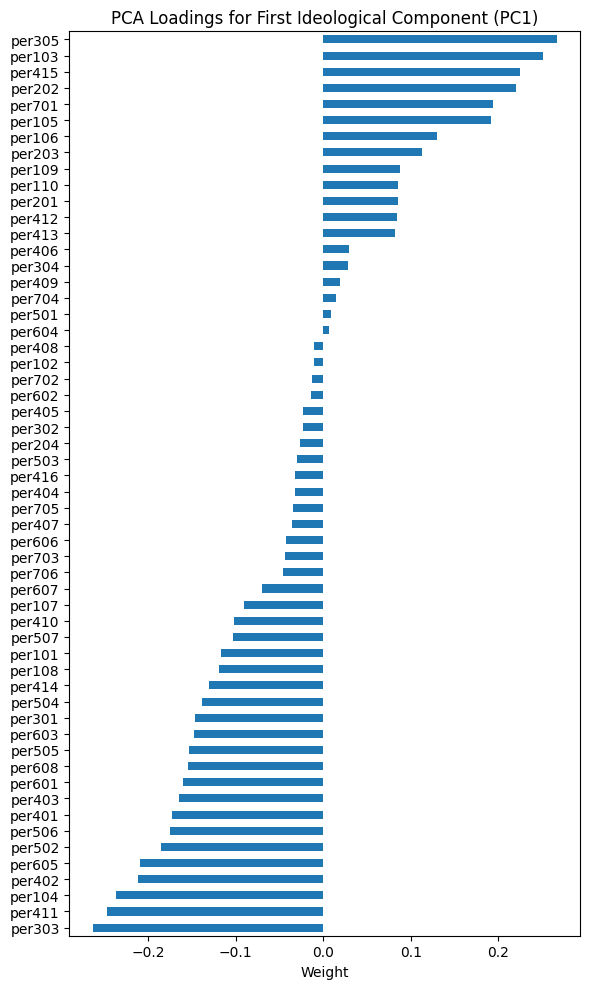

In [110]:
# Correlation of PC1 with original variables
loadings = pd.Series(pca.components_[0], index=policy_cols).sort_values()

plt.figure(figsize=(6, 10))
loadings.plot(kind='barh')
plt.title('PCA Loadings for First Ideological Component (PC1)')
plt.xlabel('Weight')
plt.tight_layout()
plt.show()

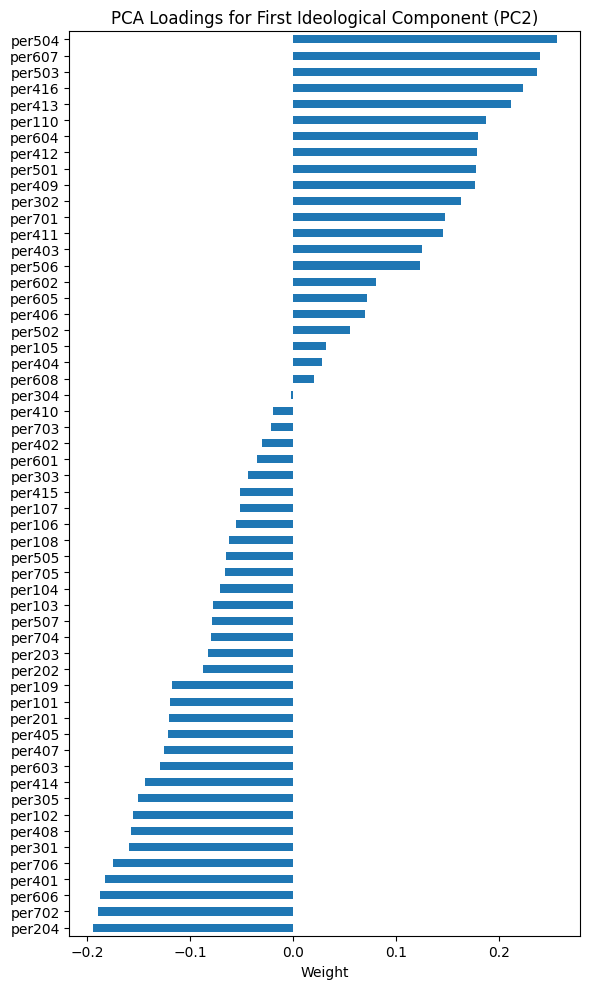

In [112]:
# Correlation of PC1 with original variables
loadings = pd.Series(pca.components_[1], index=policy_cols).sort_values()

plt.figure(figsize=(6, 10))
loadings.plot(kind='barh')
plt.title('PCA Loadings for First Ideological Component (PC2)')
plt.xlabel('Weight')
plt.tight_layout()
plt.show()

Variables with strong positive or negative weights indicate which issue categories define the ideological axis.

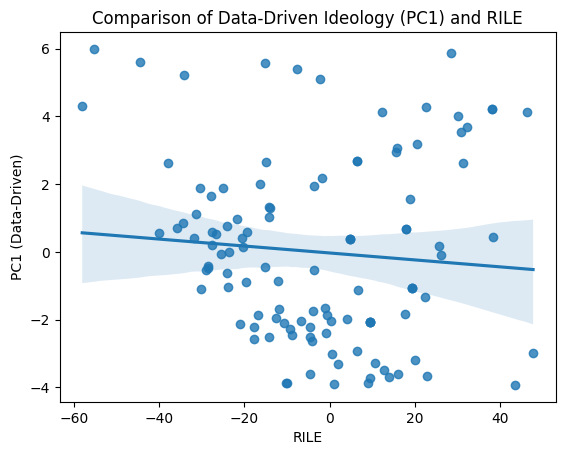

Correlation between RILE and PC1: -0.09


In [104]:
sns.regplot(x='rile', y='PC1', data=df_pm_portugal)
plt.title('Comparison of Data-Driven Ideology (PC1) and RILE')
plt.xlabel('RILE')
plt.ylabel('PC1 (Data-Driven)')
plt.show()

corr = df_pm_portugal[['rile', 'PC1']].corr().iloc[0,1]
print(f"Correlation between RILE and PC1: {corr:.2f}")

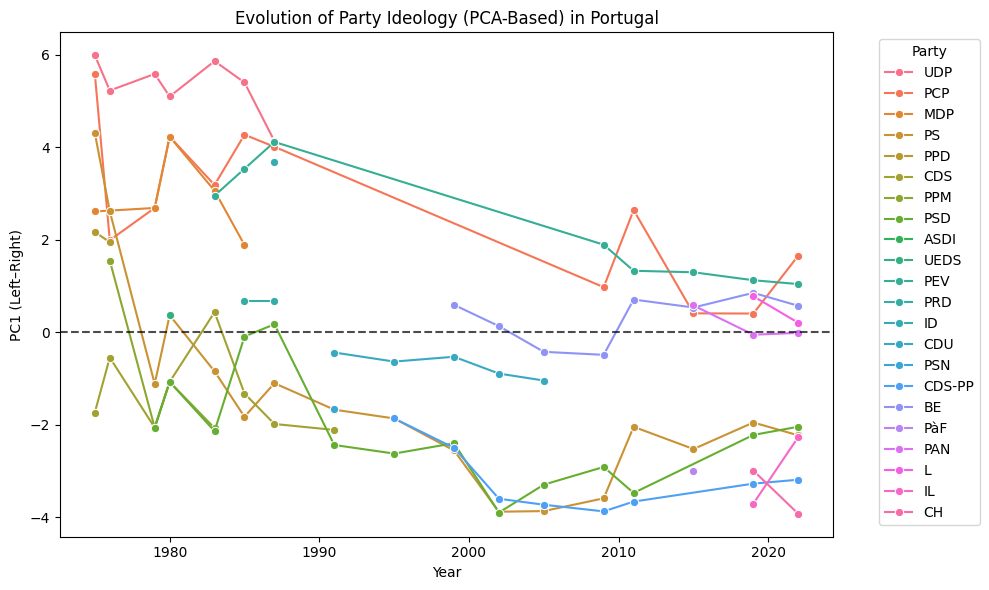

In [106]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_pm_portugal, x='year', y='PC1', hue='partyabbrev', marker='o')
plt.axhline(0, color='black', linestyle='--', alpha=0.7)
plt.title('Evolution of Party Ideology (PCA-Based) in Portugal')
plt.xlabel('Year')
plt.ylabel('PC1 (Left–Right)')
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


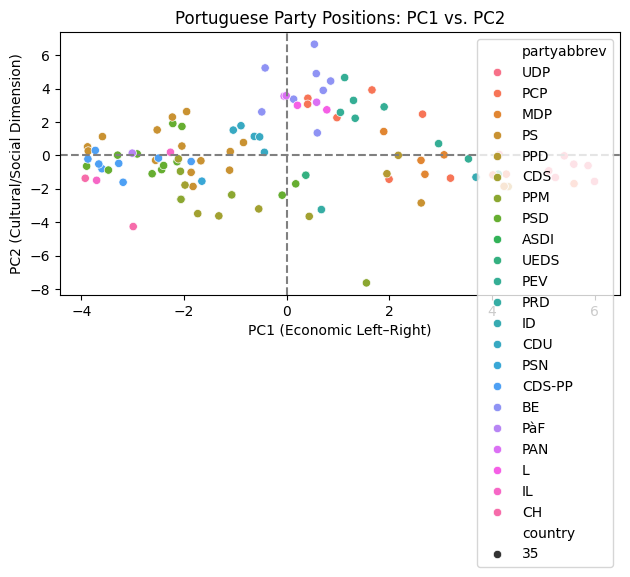

In [107]:
sns.scatterplot(
    data=df_pm_portugal, 
    x='PC1', y='PC2', hue='partyabbrev', style='country'
)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.title('Portuguese Party Positions: PC1 vs. PC2')
plt.xlabel('PC1 (Economic Left–Right)')
plt.ylabel('PC2 (Cultural/Social Dimension)')
plt.tight_layout()
plt.show()

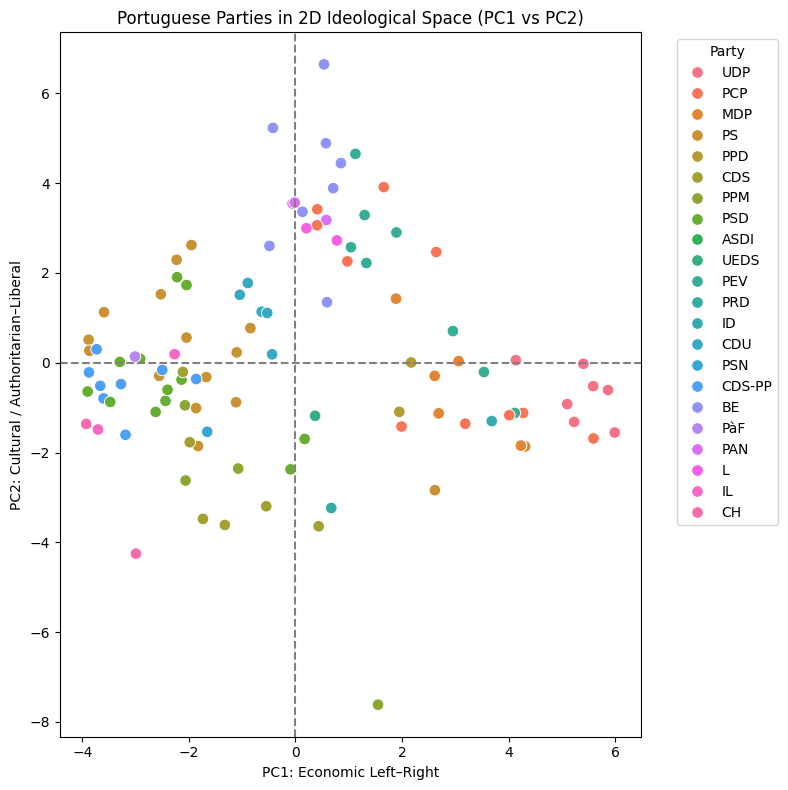

In [108]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_pm_portugal, x='PC1', y='PC2', hue='partyabbrev', s=70)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.title('Portuguese Parties in 2D Ideological Space (PC1 vs PC2)')
plt.xlabel('PC1: Economic Left–Right')
plt.ylabel('PC2: Cultural / Authoritarian–Liberal')
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

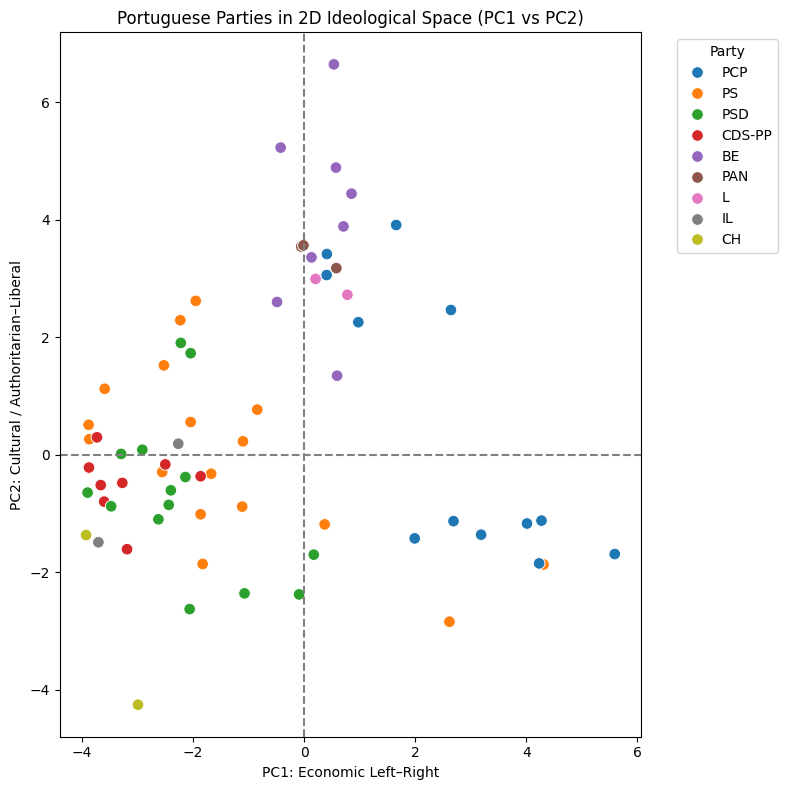

In [109]:
# --- Define the parties to include ---
parties_to_keep = ['BE', 'PCP', 'L', 'PS', 'PAN', 'JPP', 'PSD', 'IL', 'CDS-PP', 'CH']

# --- Filter the dataframe ---
df_plot = df_pm_portugal[df_pm_portugal['partyabbrev'].isin(parties_to_keep)].copy()

plt.figure(figsize=(8,8))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='partyabbrev', s=70)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.title('Portuguese Parties in 2D Ideological Space (PC1 vs PC2)')
plt.xlabel('PC1: Economic Left–Right')
plt.ylabel('PC2: Cultural / Authoritarian–Liberal')
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Variable explanations

In [160]:
# Open variable explanations

mapping = pd.read_csv("manifesto_policy_variables.csv")

mapping

,Variable,Description,Domain
0,per101,Foreign Special Relationships: Positive,External Relations
1,per102,Foreign Special Relationships: Negative,External Relations
2,per103,Anti-Imperialism,External Relations
3,per104,Military: Positive,External Relations
4,per105,Military: Negative,External Relations
5,per106,Peace,External Relations
6,per107,Internationalism: Positive,External Relations
7,per108,European Community/Union: Positive,External Relations
8,per109,Internationalism: Negative,External Relations
9,per110,European Community/Union: Negative,External Relations


In [161]:
rename_dict = dict(zip(mapping['Variable'], mapping['Description']))



In [162]:
#This was before i changed anything

In [163]:
# 2) Build sets for matching
policy_codes = set(mapping['Variable'])
policy_names = set(mapping['Description'])


In [164]:
# 3) Auto-detect whether df columns are codes or names, then select
if any(col in policy_codes for col in df_pm_portugal.columns):
    # Columns are still codes like 'per101'
    policy_cols = [c for c in df_pm_portugal.columns if c in policy_codes]
elif any(col in policy_names for col in df_pm_portugal.columns):
    # Columns were already renamed to descriptions
    policy_cols = [c for c in df_pm_portugal.columns if c in policy_names]
else:
    raise ValueError("No policy columns found: neither codes nor names match the mapping.")


In [165]:
# Scale (will fail clearly if nothing remains)
if X.shape[1] == 0:
    raise ValueError("After cleaning, no numeric policy columns remain to scale.")
X_scaled = StandardScaler().fit_transform(X)

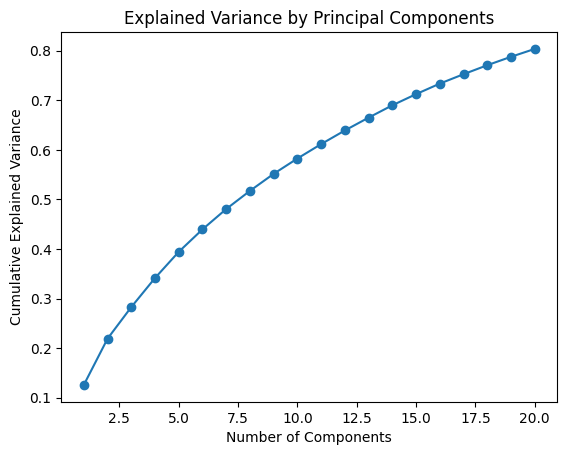

In [166]:
pca = PCA(n_components=20)
pca_result = pca.fit_transform(X_scaled)

# Add principal components back to the dataframe
for i in range(pca_result.shape[1]):
    df_pm_portugal[f'PC{i+1}'] = pca_result[:, i]

# Explained variance
explained_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, 21), explained_var, marker='o')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

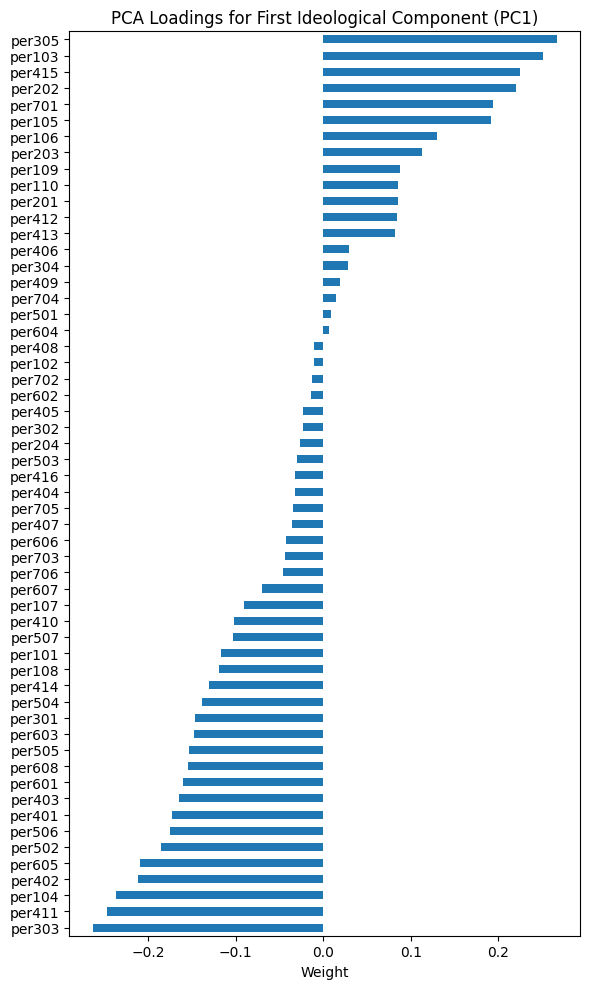

In [167]:
# Correlation of PC1 with original variables
loadings = pd.Series(pca.components_[0], index=policy_cols).sort_values()

plt.figure(figsize=(6, 10))
loadings.plot(kind='barh')
plt.title('PCA Loadings for First Ideological Component (PC1)')
plt.xlabel('Weight')
plt.tight_layout()
plt.show()

In [119]:
df_pm_portugal = df_pm_portugal.rename(columns=rename_dict)

df_pm_portugal



,country,countryname,oecdmember,eumember,edate,year,party,partyname,partyabbrev,parfam,coderid,manual,pervote,voteest,absseat,totseats,progtype,datasetorigin,total,peruncod,Foreign Special Relationships: Positive,Foreign Special Relationships: Negative,Anti-Imperialism,Military: Positive,Military: Negative,Peace,Internationalism: Positive,European Community/Union: Positive,Internationalism: Negative,European Community/Union: Negative,Freedom and Human Rights,Democracy,Constitutionalism: Positive,Constitutionalism: Negative,Decentralization,Centralisation,Governmental and Administrative Efficiency,Political Corruption,Political Authority,Free Market Economy,Incentives: Positive,Market Regulation,Economic Planning,Corporatism/Mixed Economy,Protectionism: Positive,Protectionism: Negative,Economic Goals,Keynesian Demand Management,Economic Growth: Positive,Technology and Infrastructure: Positive,Controlled Economy,Nationalisation,Economic Orthodoxy,Marxist Analysis,Anti-Growth Economy: Positive,Environmental Protection,Culture: Positive,Equality: Positive,Welfare State Expansion,Welfare State Limitation,Education Expansion,Education Limitation,National Way of Life: Positive,National Way of Life: Negative,Traditional Morality: Positive,Traditional Morality: Negative,Law and Order: Positive,Civic Mindedness: Positive,Multiculturalism: Positive,Multiculturalism: Negative,Labour Groups: Positive,Labour Groups: Negative,Agriculture and Farmers: Positive,Middle Class and Professional Groups,Underprivileged Minority Groups,Non-economic Demographic Groups,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,35,Portugal,10,0,25/04/1975,1975,35210,Popular Democratic Union,UDP,20,224,1,0.840000,0.0,1.0,250.0,1,10,121.0,0.000,0.000,0.0,4.959,0.000,0.826,0.000,0.000,0.000,2.479,0.000,0.000,50.413,0.000,0.000,0.000,0.000,0.000,0.000,5.785,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,19.835,0.000,0.000,0.000,4.959,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,4.959,0.000,3.306,0.000,0.000,2.479,-55.372,0.000,0.000,4.959,0.826,2025a,Y1GQ3J,5.993452,-1.554517,2.848806,-0.933282,-1.743777,-1.159271,-2.413520,-4.300074,-0.300347,0.237862,-0.320860,-0.307406,1.071031,-1.402535,-0.658609,0.711124,-0.877332,-0.135567,1.248582,1.919902
1,35,Portugal,10,0,25/04/1975,1975,35220,Portuguese Communist Party,PCP,20,224,1,13.460000,0.0,30.0,250.0,1,10,157.0,3.822,0.000,0.0,7.643,0.000,0.000,0.000,0.637,0.000,0.000,0.000,1.911,46.497,2.548,0.000,0.000,0.000,0.637,0.000,14.013,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.911,0.000,0.000,0.000,0.000,0.637,0.000,8.280,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.637,0.0,0.000,0.000,0.000,0.000,8.280,0.000,1.274,1.274,0.000,0.000,-44.586,0.000,0.000,0.000,0.000,2025a,S7TB52,5.594158,-1.687083,2.505053,-2.072722,0.037605,-1.216696,-1.613853,-3.244072,0.034379,0.151240,0.201673,-0.022764,0.461481,-0.561319,-0.590068,0.394173,-0.139534,-0.664559,0.800551,0.397735
2,35,Portugal,10,0,25/04/1975,1975,35310,Popular Democratic Movement,MDP,30,224,1,4.430000,0.0,5.0,250.0,1,10,132.0,0.000,0.758,0.0,3.788,0.000,0.000,0.000,2.273,0.000,0.000,0.000,6.818,18.939,0.000,0.000,3.030,0.000,1.515,0.000,4.545,0.000,0.758,0.758,0.000,0.000,0.000,0.000,3.788,0.000,1.515,3.788,1.515,1.515,0.758,9.848,0.000,0.000,3.030,1.515,9.091,0.000,6.061,0.000,0.000,0.000,0.000,0.0,0.758,0.000,0.000,0.000,7.576,0.000,5.303,0.000,0.758,0.000,-37.879,2.273,0.758,10.606,0.000,2025a,OA17UI,2.613666,-0.292647,1.266892,-1.799224,-1.299286,-0.375360,-0.930050,-1.712175,1.477470,-0.800499,-0.718107,0.372122,0.275240,-0.353639,-0.166535,0.847172,0.236849,0.075583,-0.497446,0.286678
3,35,Portugal,10,0,25/04/1975,1975,35311,Socialist Party,PS,30,224,1,40.690000,0.0,116.0,250.0,1,10,74.0,0.000,2.703,0.0,9.459,0.000,2.703,0.000,8.108,0.000,0.000,0.000,4.054,40.541,0.000,0.000,0.000,0.0

In [122]:
# Select all issue variables (the perXXX columns)

# Select only those columns that are recognized policy names
policy_cols = [c for c in df_pm_portugal.columns if c in mapping]

X = df_pm_portugal[policy_cols].copy()
X_scaled = StandardScaler().fit_transform(X)

ValueError: at least one array or dtype is required

In [ ]:
pca = PCA(n_components=20)
pca_result = pca.fit_transform(X_scaled)

# Add principal components back to the dataframe
for i in range(pca_result.shape[1]):
    df_pm_portugal[f'PC{i+1}'] = pca_result[:, i]

# Explained variance
explained_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, 21), explained_var, marker='o')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

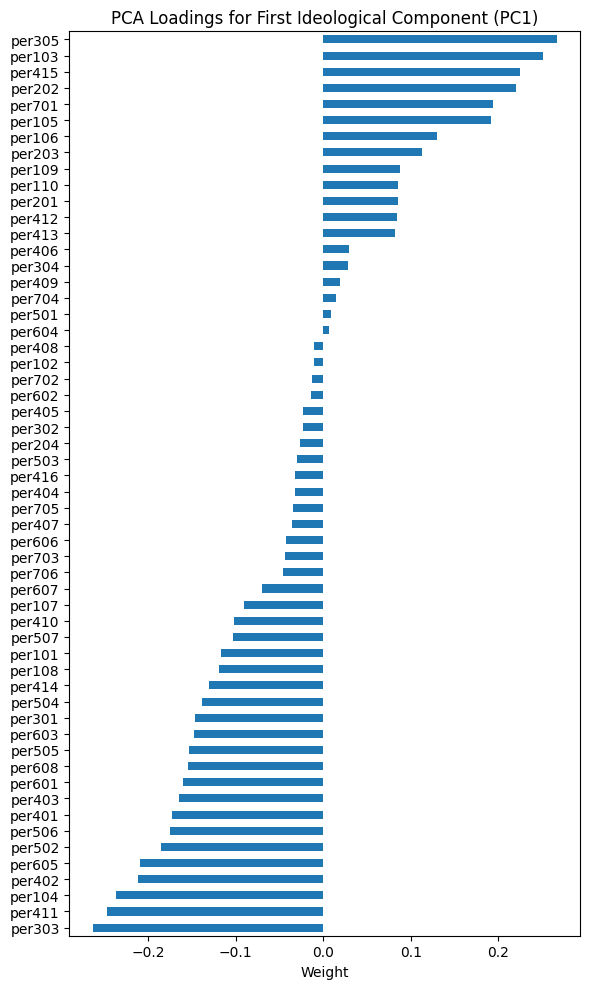

In [120]:
# Correlation of PC1 with original variables
loadings = pd.Series(pca.components_[0], index=policy_cols).sort_values()

plt.figure(figsize=(6, 10))
loadings.plot(kind='barh')
plt.title('PCA Loadings for First Ideological Component (PC1)')
plt.xlabel('Weight')
plt.tight_layout()
plt.show()